In [1]:
from gamearg import *
from IPython.display import display, Image

## Facts Define

In [2]:
%%file files/test.lp
move(a,b).
move(a,c).
move(k,l).
move(c,d).
move(c,e).
move(l,e).
move(l,m).
move(d,e).
move(e,d).
move(e,m).
move(m,e).
move(d,f).
move(d,g).
move(g,d).
move(e,h).
move(m,n).
move(n,m).

Overwriting files/test.lp


**Note**: For the given example, if you change the `reverse` paramater to `True` you will get 4 possible worlds below; `False` results in 2 possible worlds.

In [3]:
# You only need edit this cell
input_file = "files/test.lp"
keyword = "game" #arg or game depends on the graphvis_settings.json
reverse = False  # whether you want to reverse the edge direction

## Show Plain Graph

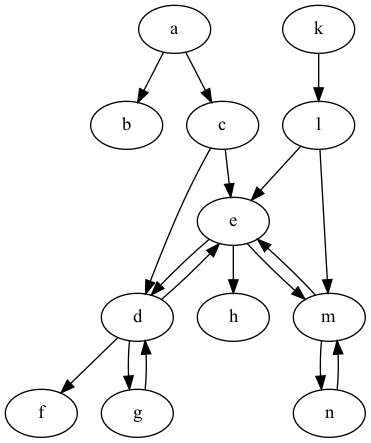

In [4]:
show_plain(input_file, keyword, reverse)

## Well-Founded Semantics

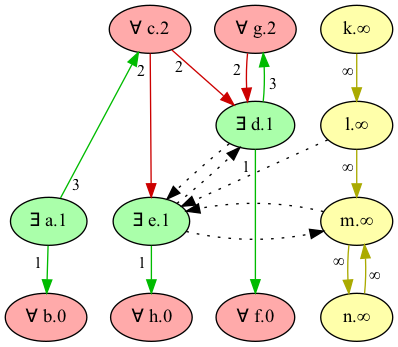

In [5]:
show_wfs(input_file, keyword, reverse)

## Stable Models

In [6]:
show_stb(input_file, keyword, reverse)

In [7]:
wfs_stb_pws, df_wfs_stb = node_stb_cal(input_file, keyword, reverse)

In [8]:
df_wfs_stb

,node,state_id,wfs,pw_1,pw_2
0,b,0,lost,lost,lost
1,f,0,lost,lost,lost
2,h,0,lost,lost,lost
3,e,1,won,won,won
4,d,1,won,won,won
5,a,1,won,won,won
6,c,2,lost,lost,lost
7,g,2,lost,lost,lost
8,k,∞,draw,lost,won
9,l,∞,draw,won,lost


In [9]:
if keyword=="game":
    status_1="lost"
    status_2="won"
else:
    status_1="accepted"
    status_2="defeated"
count_columns = [col for col in df_wfs_stb.columns if col.startswith('pw_')]
df_wfs_stb[f'{status_1}_count'] = df_wfs_stb[count_columns].apply(lambda row: sum(row == status_1), axis=1)
df_wfs_stb[f'{status_2}_count'] = df_wfs_stb[count_columns].apply(lambda row: sum(row == status_2), axis=1)
aggregated_counts = df_wfs_stb.groupby('node').agg({f'{status_1}_count': 'sum', f'{status_2}_count': 'sum'}).reset_index()

aggregated_counts

,node,lost_count,won_count
0,a,0,2
1,b,2,0
2,c,2,0
3,d,0,2
4,e,0,2
5,f,2,0
6,g,2,0
7,h,2,0
8,k,1,1
9,l,1,1
